# Demo: Exploring Time Series Data

In [2]:
# Initial imports
import pandas as pd
import hvplot.pandas
import numpy as np
from pathlib import Path

## Loading Time Series Data Into a DataFrame

In [3]:
# Set the file path
file_path = Path("../Resources/national-home-sales.csv")

In [4]:
# Load time series data into Pandas
df_home_sales = pd.read_csv(file_path, index_col="period_end_date", parse_dates=True)

In [5]:
# Display sample data
df_home_sales.head(10)

,inventory,homes_sold,median_sale_price
period_end_date,,,
2020-01-01,1250798,377964,289000
2020-02-01,1265253,405992,294000
2020-03-01,1316823,507324,303000
2020-04-01,1297460,436855,304000
2020-05-01,1289500,421351,299000
2020-06-01,1219863,587635,310000
2020-07-01,1165359,700733,323000
2020-08-01,1066903,652878,328000
2012-02-01,2078931,304737,160000


In [6]:
# Sort the DataFrame index in ascending order
df_home_sales.sort_index(ascending=True)
# Display sample data
df_home_sales.head()

,inventory,homes_sold,median_sale_price
period_end_date,,,
2020-01-01,1250798,377964,289000
2020-02-01,1265253,405992,294000
2020-03-01,1316823,507324,303000
2020-04-01,1297460,436855,304000
2020-05-01,1289500,421351,299000


## Identifying Seasonal Patterns

<AxesSubplot:xlabel='period_end_date'>

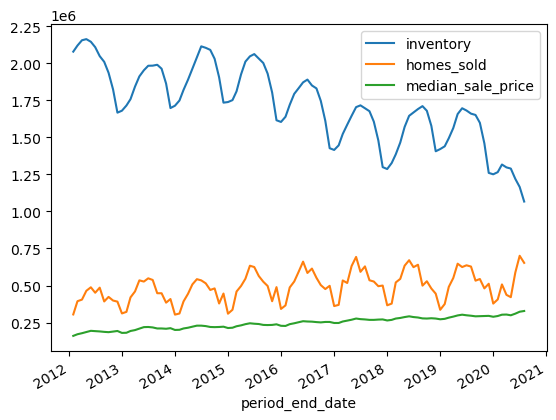

In [7]:
# Plot the inventory and homes_sold series
df_home_sales.plot()

In [9]:
# Select homes sold in 2014 using the year
homes_sold_2014 = df_home_sales.loc['2014']

# Display 2014 home sales data
homes_sold_2014

,inventory,homes_sold,median_sale_price
period_end_date,,,
2014-01-01,1713791,303454,200000
2014-02-01,1748964,310918,201000
2014-03-01,1820559,392509,210000
2014-04-01,1889755,444227,215000
2014-05-01,1963564,507516,222000
2014-06-01,2040323,542753,229000
2014-07-01,2114760,534616,229000
2014-08-01,2104706,514686,226000
2014-09-01,2090802,469975,220000


<AxesSubplot:xlabel='period_end_date'>

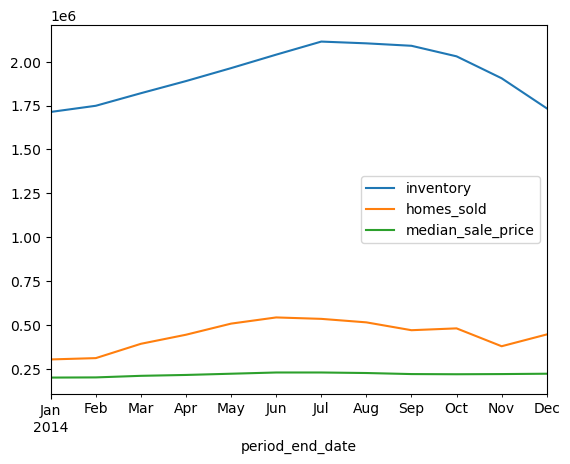

In [10]:
# Plot 2014 home sales data
homes_sold_2014.plot()

In [11]:
# Compute the total home sales per quarter
homes_sold_2014['homes_sold'].sum()

5325470

In [16]:
# Display total home sales per quarter
quarterly_sales= df_home_sales['homes_sold'].groupby(by=[df_home_sales.index.quarter]).sum()
quarterly_sales

period_end_date
1    10081561
2    14788243
3    14518462
4    11126303
Name: homes_sold, dtype: int64

<AxesSubplot:xlabel='period_end_date'>

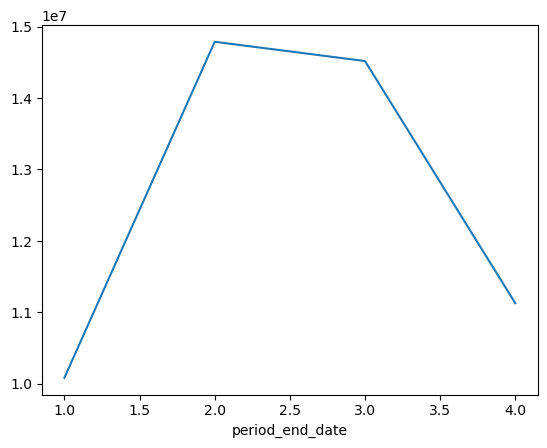

In [17]:
# Plot total home sales per quarter
quarterly_sales.plot()

In [22]:
# Compute total quarterly home sales per year
quarterly_sales_per_year = df_home_sales['homes_sold'].groupby(by=[df_home_sales.index.weekday,df_home_sales.index.quarter]).sum()
quarterly_sales_per_year

period_end_date  period_end_date
0                1                   732168
                 2                  2863440
                 3                  2269101
                 4                  1397578
1                1                  1134342
                 2                  1542446
                 3                  1689379
                 4                  1956578
2                1                  1889535
                 2                  2776995
                 3                  2451217
                 4                   975913
3                1                  1602317
                 2                  1200430
                 3                  1717373
                 4                  1872908
4                1                  1949627
                 2                  2652559
                 3                  1634728
                 4                  1364436
5                1                  1109419
                 2                  1668180

In [ ]:
# Display total quarterly home sales per year


In [ ]:
# Plot total quarterly home sales per year


In [13]:
# Plot quarterly home sales per year using a heatmap
df_home_sales.hvplot.heatmap(
    x='index.year',
    y='index.quarter',
    C='homes_sold',
    cmap='blues'
).aggregate(function=np.mean)

:HeatMap   [index.year,index.quarter]   (homes_sold)